<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:

print("Column Names:")
print(df.columns)


print("\nData Types:")
print(df.dtypes)


print("\nInfo:")
print(df.info())


print("\nHead:")
print(df.head())


print("\nShape:")
print(df.shape)


Column Names:
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

Data Types:
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None

Head:
   ResponseI

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [4]:
print("Missing Values per Column:")
print(df.isna().sum())

print("\nMissing Percentage:")
print((df.isna().mean() * 100).round(2))

Missing Values per Column:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

Missing Percentage:
ResponseId              0.00
MainBranch              0.00
Age                     0.00
Employment              0.00
RemoteWork             16.25
                       ...  
JobSatPoints_11        55.00
SurveyLength           14.14
SurveyEase             14.06
ConvertedCompYearly    64.19
JobSat                 55.49
Length: 114, dtype: float64


In [5]:

# فصل الأعمدة حسب النوع
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# تعويض القيم العددية بالمتوسط
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# تعويض القيم النصية بالمنوال
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [6]:
df.isna().sum()

,0
ResponseId,0
MainBranch,0
Age,0
Employment,0
RemoteWork,0
...,...
JobSatPoints_11,0
SurveyLength,0
SurveyEase,0
ConvertedCompYearly,0


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [7]:
# تحليل عمود Employment
print("Employment Distribution:")
print(df['Employment'].value_counts(dropna=False))
print("\n")

# تحليل عمود JobSat (Job Satisfaction)
print("JobSat Distribution:")
print(df['JobSat'].value_counts(dropna=False))
print("\n")

# تحليل عمود YearsCodePro (Professional Coding Experience)
print("YearsCodePro Distribution:")
print(df['YearsCodePro'].value_counts(dropna=False))
print("\n")


Employment Distribution:
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking fo

In [8]:
df['YearsCodePro'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 65437 entries, 0 to 65436
Series name: YearsCodePro
Non-Null Count  Dtype 
--------------  ----- 
65437 non-null  object
dtypes: object(1)
memory usage: 511.4+ KB


In [9]:


# 1) تنظيف الفراغات والنصوص الغريبة
df['YearsCodePro'] = df['YearsCodePro'].astype(str).str.strip()

# 2) تحويل القيم الخاصة
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0',
    'More than 50 years': '50',
})

# 3) تحويل النصوص الرقمية إلى Float / Int
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# 4) تعويض القيم المفقودة بالمتوسط أو أي قيمة مناسبة
df['YearsCodePro'] = df['YearsCodePro'].fillna(df['YearsCodePro'].median())
df['YearsCodePro'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 65437 entries, 0 to 65436
Series name: YearsCodePro
Non-Null Count  Dtype
--------------  -----
65437 non-null  int64
dtypes: int64(1)
memory usage: 511.4 KB


### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


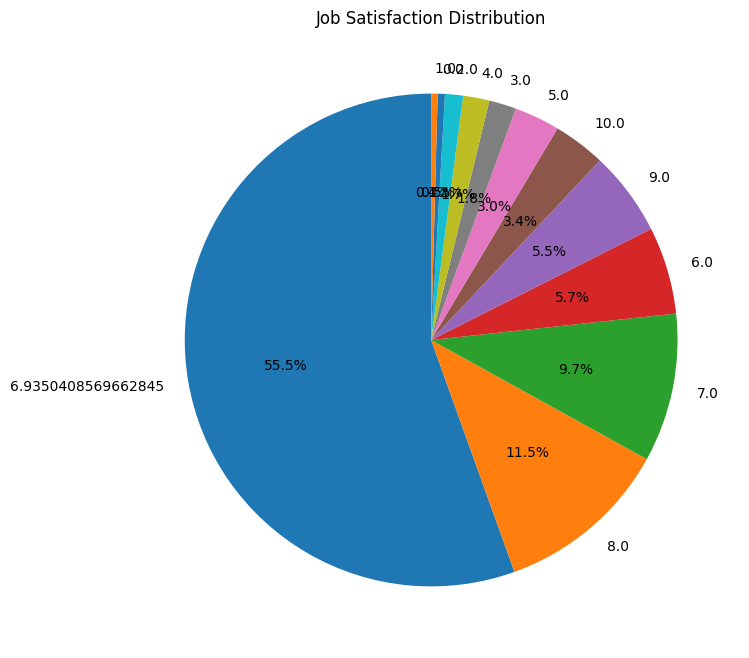

In [10]:
import matplotlib.pyplot as plt

# حساب التوزيع
job_counts = df['JobSat'].value_counts()

# رسم المخطط الدائري
plt.figure(figsize=(8,8))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Job Satisfaction Distribution')
plt.show()


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [11]:
# تحويل الأعمدة إلى قوائم
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].fillna('').apply(lambda x: x.split(';'))

df['LanguageWantToWorkWith'] = df['LanguageWantToWorkWith'].fillna('').apply(lambda x: x.split(';'))


In [12]:
from collections import Counter

# Flatten القوائم وحساب التكرارات
have_counts = Counter([lang for sublist in df['LanguageHaveWorkedWith'] for lang in sublist])
want_counts = Counter([lang for sublist in df['LanguageWantToWorkWith'] for lang in sublist])

# تحويل إلى DataFrame للتسهيل
df_lang = pd.DataFrame({
    'Language': list(have_counts.keys()),
    'HaveWorkedWith': list(have_counts.values()),
    'WantToWorkWith': [want_counts.get(lang, 0) for lang in have_counts.keys()]
}).sort_values('HaveWorkedWith', ascending=False)


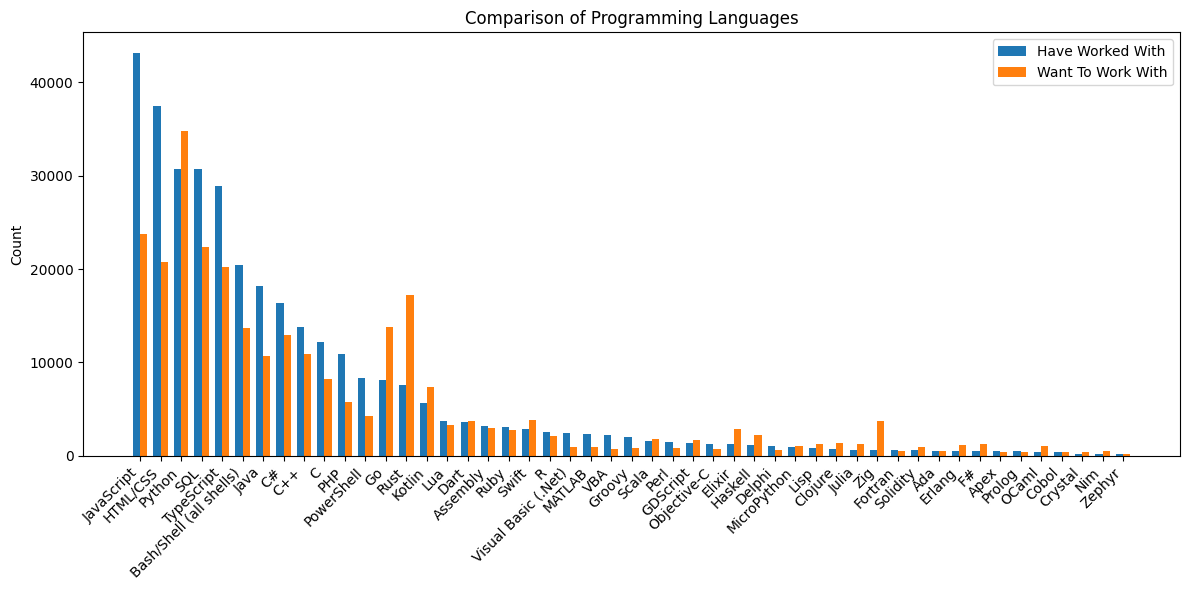

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(df_lang))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, df_lang['HaveWorkedWith'], width, label='Have Worked With')
plt.bar(x + width/2, df_lang['WantToWorkWith'], width, label='Want To Work With')

plt.xticks(x, df_lang['Language'], rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Comparison of Programming Languages')
plt.legend()
plt.tight_layout()
plt.show()


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


In [14]:

# نظرة سريعة على الأعمدة المطلوبة
df[['RemoteWork', 'Country']].head()


,RemoteWork,Country
0,Remote,United States of America
1,Remote,United Kingdom of Great Britain and Northern I...
2,Remote,United Kingdom of Great Britain and Northern I...
3,"Hybrid (some remote, some in-person)",Canada
4,"Hybrid (some remote, some in-person)",Norway


In [16]:
# إنشاء جدول تكراري
remote_country = pd.crosstab(df['Country'], df['RemoteWork'])

# عرض البيانات
print(remote_country)


RemoteWork                            Hybrid (some remote, some in-person)  \
Country                                                                      
Afghanistan                                                             33   
Albania                                                                 25   
Algeria                                                                 47   
Andorra                                                                  6   
Angola                                                                   9   
...                                                                    ...   
Venezuela, Bolivarian Republic of...                                    20   
Viet Nam                                                               158   
Yemen                                                                    9   
Zambia                                                                   7   
Zimbabwe                                                        

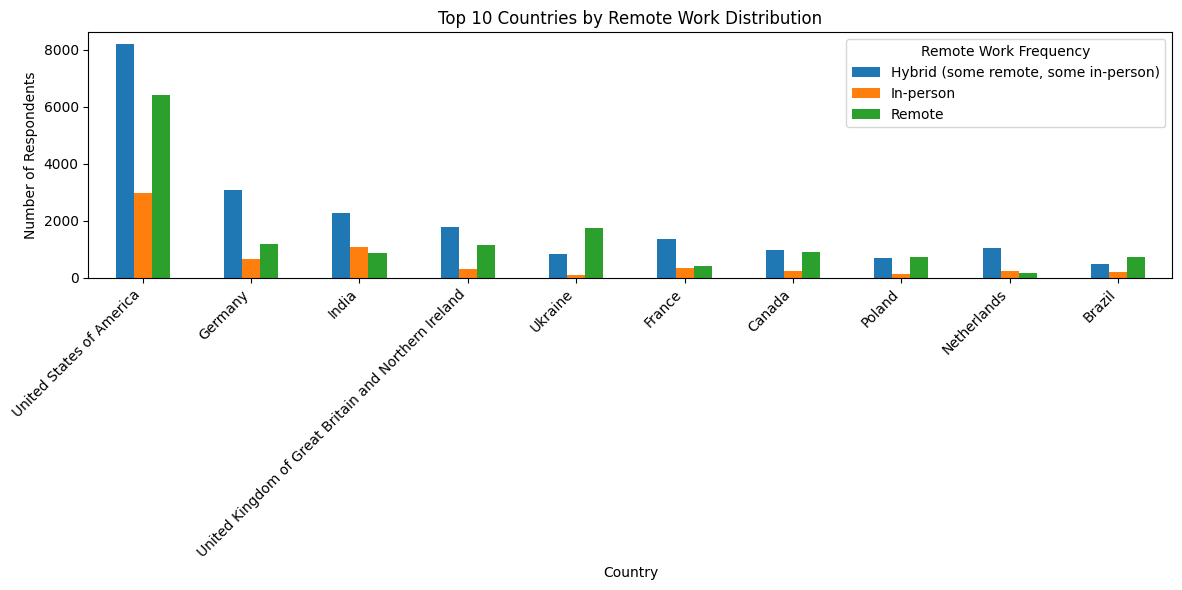

In [17]:

# حساب إجمالي عدد المستجيبين لكل دولة
remote_country['Total'] = remote_country.sum(axis=1)

# ترتيب الدول تنازليًا واختيار أعلى 10
top10 = remote_country.sort_values('Total', ascending=False).head(10)

# حذف عمود Total قبل الرسم (اختياري)
top10_plot = top10.drop(columns='Total')

# رسم المخطط
import matplotlib.pyplot as plt

top10_plot.plot(kind='bar', figsize=(12,6))
plt.title("Top 10 Countries by Remote Work Distribution")
plt.xlabel("Country")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Remote Work Frequency')
plt.tight_layout()
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [18]:
df['YearsCodePro'].unique()

array([ 2, 17, 27,  7, 11, 25, 12, 10,  3,  0, 18, 37, 15, 20,  6, 16,  8,
       14,  4, 45,  1, 24, 29,  5, 30, 26,  9, 33, 13, 35, 23, 22, 31, 19,
       21, 28, 34, 32, 40, 50, 39, 44, 42, 41, 36, 38, 43, 47, 48, 46, 49])

In [19]:
df['JobSat'].unique()

array([ 6.93504086,  8.        ,  5.        , 10.        ,  6.        ,
        9.        ,  4.        ,  7.        ,  3.        ,  2.        ,
        1.        ,  0.        ])

In [20]:
# Pearson correlation
!pip install scipy



In [21]:
df_clean = df[['JobSat', 'YearsCodePro']].dropna()

pearson_corr = df_clean['JobSat'].corr(df_clean['YearsCodePro'], method='pearson')
print("Pearson correlation:", pearson_corr)
spearman_corr = df_clean['JobSat'].corr(df_clean['YearsCodePro'], method='spearman')
print("Spearman correlation:", spearman_corr)


Pearson correlation: 0.06963173659441124
Spearman correlation: 0.15037616598908146


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [22]:
df[['EdLevel', 'Employment']].isnull().sum()

,0
EdLevel,0
Employment,0


In [23]:
employment_edu = pd.crosstab(df['Employment'], df['EdLevel'])
# إضافة عمود إجمالي لكل Employment
employment_edu['Total'] = employment_edu.sum(axis=1)

# اختيار أعلى 10 حالات توظيف حسب إجمالي المستجيبين
top10 = employment_edu.sort_values('Total', ascending=False).head(10).drop(columns='Total')


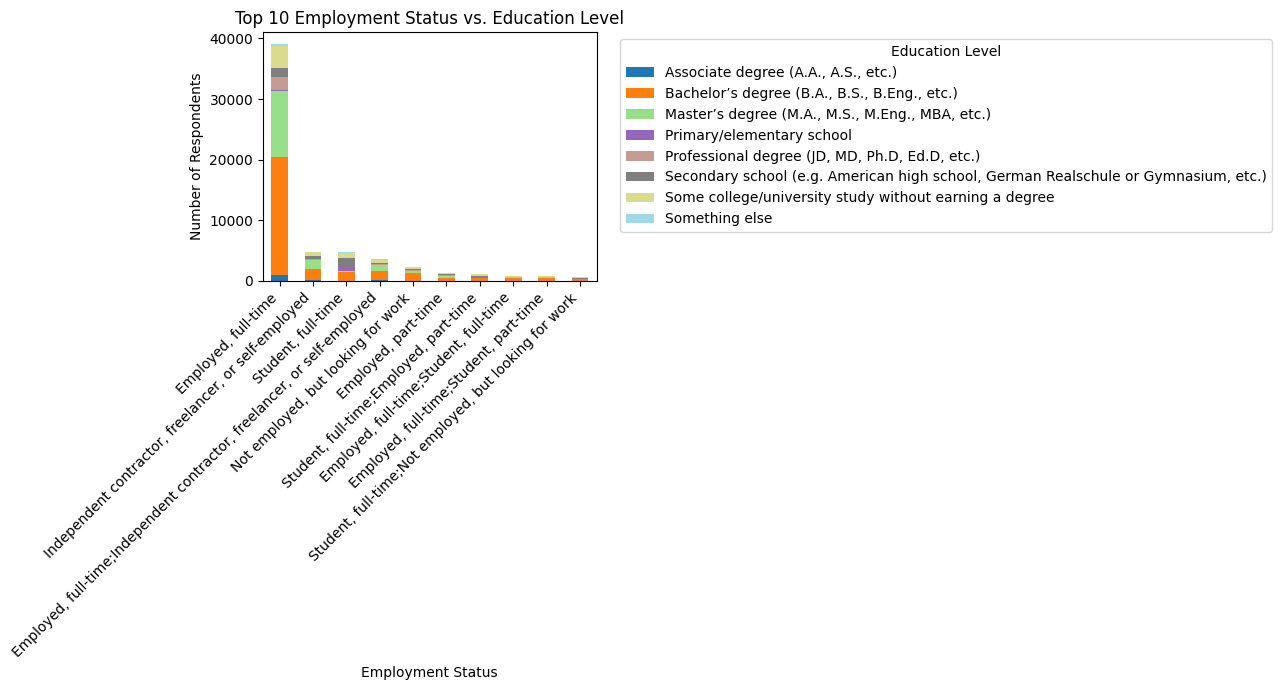

In [24]:
top10.plot(kind='bar', stacked=True, figsize=(12,7), colormap='tab20')
plt.title("Top 10 Employment Status vs. Education Level")
plt.xlabel("Employment Status")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [25]:
# افترض أن df_clean هو الـ DataFrame النهائي بعد التنظيف
df_clean.to_csv("cleaned_dataset.csv", index=False)

print("Dataset saved successfully as 'cleaned_dataset.csv'")


Dataset saved successfully as 'cleaned_dataset.csv'


Copyright © IBM Corporation. All rights reserved.
